**ASSIGNMENT 9 : DENSE AND CONVULOTIONAL NEURAL NETWORKS**<br>
**STUDENT NAME : HARSH HIMMATBHAI DHAMLEEYA**<br>
**STUDENT ID : 8926600**

**TASK 1**:Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).

Importing libraries

In [18]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns


Database and Exploration

In [8]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Explore the dataset
num_train_samples = train_images.shape[0]
num_test_samples = test_images.shape[0]
image_shape = train_images.shape[1:]
num_classes = len(np.unique(train_labels))

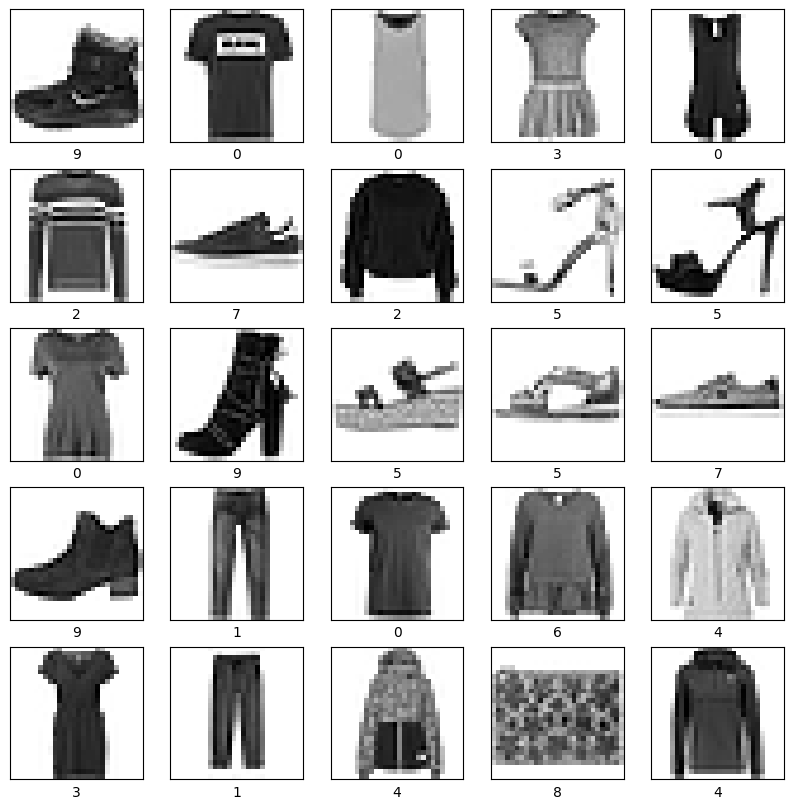

{'num_train_samples': 60000,
 'num_test_samples': 10000,
 'image_shape': (28, 28),
 'num_classes': 10}

In [9]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

{
    "num_train_samples": num_train_samples,
    "num_test_samples": num_test_samples,
    "image_shape": image_shape,
    "num_classes": num_classes
}


**TASK 2:**Train a dense neural network using Keras, try out at least three hyperparameters configurations

**2.1 : Preprocessing the Data**

In [10]:
# Load data

train_images = train_images / 255.0
test_images = test_images / 255.0

**2.2 : Building the Base Model**

In [12]:
def create_model(layers, activation, optimizer):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  # Flatten the input
    for layer_size in layers:
        model.add(Dense(layer_size, activation=activation))
    model.add(Dense(10, activation='softmax'))  # Output layer
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


**Configuration 1**<br>
Layers: 2 Dense layers (128 and 64 neurons)<br>
Activation: 'relu'<br>
Optimizer: 'adam'<br>
Batch Size: 32<br>
Epochs: 10

In [13]:
# MODEL 1

model1 = create_model([128, 64], 'relu', 'adam')
model1.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4931 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3669 - accuracy: 0.8674
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3341 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3096 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2934 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2782 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2571 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2458 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.236

**Configuration 2**<br>
Layers: 3 Dense layers (256, 128, and 64 neurons)<br>
Activation: 'relu'<br>
Optimizer: 'sgd'<br>
Batch Size: 64<br>
Epochs: 20<br>

In [14]:
# MODEL 2

model2 = create_model([256, 128, 64], 'relu', 'sgd')
model2.fit(train_images, train_labels, epochs=20, batch_size=64)

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.8832 - accuracy: 0.7026
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.5435 - accuracy: 0.8113
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4821 - accuracy: 0.8318
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4481 - accuracy: 0.8432
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4256 - accuracy: 0.8507
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4082 - accuracy: 0.8570
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3937 - accuracy: 0.8627
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3800 - accuracy: 0.8664
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3703 - accuracy: 0.8699
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3615 - accuracy: 0.8726

**Configuration 3**<br>
Layers: 2 Dense layers (512 and 256 neurons)<br>
Activation: 'relu'<br>
Optimizer: 'rmsprop'<br>
Batch Size: 128<br>
Epochs: 15<br>

In [15]:
# MODEL 3

model3 = create_model([512, 256], 'relu', 'rmsprop')
model3.fit(train_images, train_labels, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 3s 5ms/step - loss: 0.5461 - accuracy: 0.8017
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3740 - accuracy: 0.8606
Epoch 3/15
469/469 [==============================] - 3s 5ms/step - loss: 0.3326 - accuracy: 0.8766
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3042 - accuracy: 0.8867
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2855 - accuracy: 0.8928
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2703 - accuracy: 0.8986
Epoch 7/15
469/469 [==============================] - 3s 5ms/step - loss: 0.2568 - accuracy: 0.9025
Epoch 8/15
469/469 [==============================] - 3s 5ms/step - loss: 0.2456 - accuracy: 0.9077
Epoch 9/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2335 - accuracy: 0.9115
Epoch 10/15
469/469 [==============================] - 3s 5ms/step - loss: 0.2270 - accuracy: 0.9146

***2.3 : Evaluation***

In [17]:
# List of all Configuration's Accuracy

test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)
test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)

print(f"Test Accuracy Configuration 1: {test_acc1}")
print(f"Test Accuracy Configuration 2: {test_acc2}")
print(f"Test Accuracy Configuration 3: {test_acc3}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3649 - accuracy: 0.8907
Test Accuracy Configuration 1: 0.8812000155448914
Test Accuracy Configuration 2: 0.8633999824523926
Test Accuracy Configuration 3: 0.8906999826431274


**TASK 3**:Evaluate its accuracy for each of the configurations. Choose the best configuration, and: Report its accuracy, confusion metric, and specific examples of incorrect classification, and drew some conclusions from this exploration 

3.1 : Choose Best model

In [21]:
# Store the models and their accuracies in a dictionary
models = {'model1': test_acc1, 'model2': test_acc2, 'model3': test_acc3}

# Identify the model with the highest accuracy
best_model_name = max(models, key=models.get)

# Assign the best model to best_model
if best_model_name == 'model1':
    best_model = model1
elif best_model_name == 'model2':
    best_model = model2
else:
    best_model = model3


3.2 : Report Accuracy and Confusion Matrix

313/313 [==============================] - 1s 2ms/step


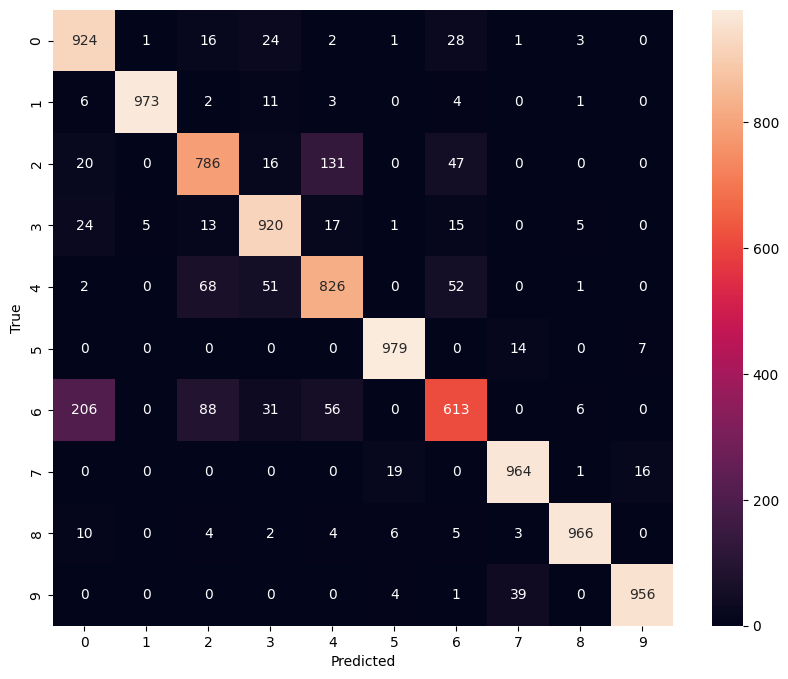

In [22]:
# Assuming 'best_model'
predictions = best_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

3.3 : Analyze Incorrect Classifications

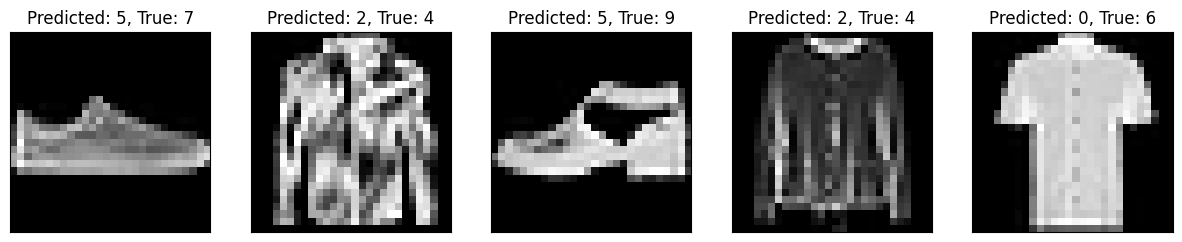

In [23]:
incorrect = np.where(predicted_labels != test_labels)[0]

# Display first few incorrect classifications
plt.figure(figsize=(15, 5))
for i, incorrect_index in enumerate(incorrect[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[incorrect_index], cmap='gray', interpolation='none')
    plt.title(f"Predicted: {predicted_labels[incorrect_index]}, True: {test_labels[incorrect_index]}")
    plt.xticks([])
    plt.yticks([])
plt.show()


<h3>***3.4 : Conclusion***</h3>
<br><br>
Compare Accuracies:<br> Look at the accuracy achieved by each model configuration. The highest accuracy indicates the most effective hyperparameters for this dataset and task.<br><br>
Analyze the Confusion Matrix:<br>
Identify which classes are most frequently confused with each other.
Check if certain classes are consistently misclassified across different configurations, which might indicate inherent difficulties in distinguishing those classes.<br><br>
Review Incorrect Classifications:<br>
See if there's a pattern in the misclassifications. Are certain types of clothing more prone to being misclassified?
Consider the implications of these misclassifications - for instance, confusing shirts with T-shirts might be less critical than confusing shoes with bags.<br><br>
Hyperparameters Impact:<br>
Reflect on how changes in hyperparameters (like the number of layers, neurons, or the type of optimizer) impacted the model's performance.
Consider if overfitting or underfitting occurred in any configuration.<br><br>
General Observations:<br>
If a more complex model (more layers/neurons) did not significantly outperform a simpler one, it might indicate that the additional complexity is unnecessary for this type of data.
If certain configurations performed significantly worse, it could point towards a mismatch between the model architecture and the task.<br><br>
Potential Improvements:<br>
Based on observations, consider potential improvements. This could include further hyperparameter tuning, using different layer types (like dropout for regularization), or even preprocessing the data differently.<br><br>
Real-world Implications:<br>
Consider how these findings might translate to a real-world application. For example, in a production scenario, the balance between accuracy and computational efficiency is crucial.<br><br>
Future Experiments:<br>
Propose future experiments or modifications based on findings. This could involve testing other types of neural network architectures (like convolutional neural networks) or experimenting with different preprocessing techniques.